In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score,precision_score,recall_score

In [3]:
# READING TEXT FILE AND ADDING COLUMNS TO IT
df = pd.read_csv(r'C:\Users\91949\Downloads\data_banknote_authentication.txt', sep=",",names=['Variance','Skewness','Kurtosis ','Entropy ','Class'], header=None)

In [4]:
df.head()

,Variance,Skewness,Kurtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Variance   1372 non-null   float64
 1   Skewness   1372 non-null   float64
 2   Kurtosis   1372 non-null   float64
 3   Entropy    1372 non-null   float64
 4   Class      1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
df.describe()

,Variance,Skewness,Kurtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


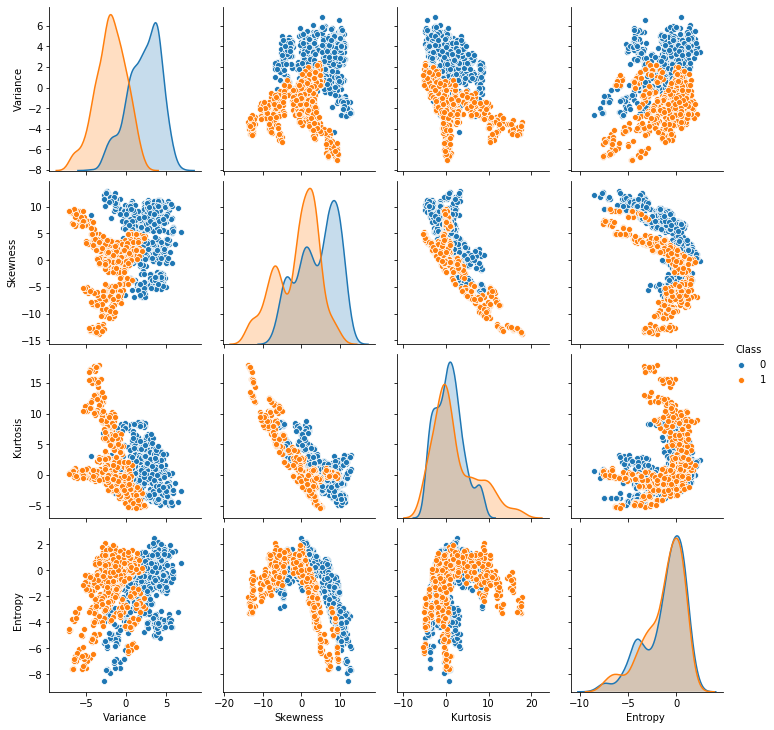

In [7]:
sns.pairplot(df,hue='Class',vars=['Variance','Skewness','Kurtosis ','Entropy '])

In [8]:
X = df[['Variance','Skewness','Kurtosis ','Entropy ']]
y = df.Class

In [10]:
X.shape

(1372, 4)

In [25]:
# splitting training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [27]:
print(X_train)


      Variance   Skewness  Kurtosis   Entropy 
1326  -1.29430   2.673500  -0.840850 -2.032300
1109  -0.40857   3.097700  -2.960700 -2.689200
1139  -1.52280  -6.478900   5.756800  0.873250
657   -0.27800   8.188100  -3.133800 -2.527600
704    3.70220   6.994200  -1.851100 -0.128890
...        ...        ...        ...       ...
763    0.39012  -0.142790  -0.031994  0.350840
835   -0.94255   0.039307  -0.241920  0.315930
1216   0.60050   0.999450  -2.212600  0.097399
559    2.01650  -0.252460   5.170700  1.076300
684   -2.07590  10.822300   2.643900 -4.837000

[1097 rows x 4 columns]


In [28]:
print(X_test)

      Variance   Skewness  Kurtosis   Entropy 
1023  -1.77130 -10.766500   10.21840  -1.00430
642    5.13210  -0.031048    0.32616   1.11510
1196  -2.01490   3.687400   -1.93850  -3.89180
31     1.48840   3.627400    3.30800   0.48921
253    5.28680   3.257000   -1.37210   1.16680
...        ...        ...        ...       ...
1342  -1.74790  -5.823000    5.86990   1.21200
251    0.57461  10.110500   -1.69170  -4.39220
1256  -2.16520   3.021100   -2.41320  -2.42410
966    0.48797   3.567400   -4.38820  -3.81160
1096  -4.36670   6.069200    0.57208  -5.46680

[275 rows x 4 columns]


In [29]:
print(y_train)

1326    1
1109    1
1139    1
657     0
704     0
       ..
763     1
835     1
1216    1
559     0
684     0
Name: Class, Length: 1097, dtype: int64


In [30]:
print(y_test)

1023    1
642     0
1196    1
31      0
253     0
       ..
1342    1
251     0
1256    1
966     1
1096    1
Name: Class, Length: 275, dtype: int64


In [33]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [34]:
print(X_train)

[[-0.60234962  0.13706318 -0.52441296 -0.41116219]
 [-0.291035    0.21026408 -1.02368742 -0.72585061]
 [-0.68266235 -1.4422953   1.02948859  0.98074362]
 ...
 [ 0.06363093 -0.15181461 -0.8474923   0.60907164]
 [ 0.5613238  -0.36784698  0.89144827  1.07801487]
 [-0.87706484  1.54323822  0.29632752 -1.75475574]]


In [35]:
print(X_test)

[[-0.77000464 -2.18217308  2.08030018  0.08130195]
 [ 1.65638872 -0.32963963 -0.24955469  1.09660204]
 [-0.85562469  0.31202402 -0.78293531 -1.301957  ]
 ...
 [-0.90845183  0.19704581 -0.89473831 -0.59885426]
 [ 0.02407911  0.29131655 -1.3598972  -1.26353714]
 [-1.68223069  0.72303272 -0.19163475 -2.05646189]]


In [36]:
print(y_train)

1326    1
1109    1
1139    1
657     0
704     0
       ..
763     1
835     1
1216    1
559     0
684     0
Name: Class, Length: 1097, dtype: int64


In [37]:
print(y_test)

1023    1
642     0
1196    1
31      0
253     0
       ..
1342    1
251     0
1256    1
966     1
1096    1
Name: Class, Length: 275, dtype: int64


In [41]:
#implementing logestic regression
lr = LogisticRegression(random_state=0)

In [42]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
predictions = lr.predict(X_test)

In [44]:
confusion_matrix(y_test,predictions)

array([[154,   3],
       [  0, 118]], dtype=int64)

In [45]:
accuracy_score(y_test,predictions)

0.9890909090909091

In [46]:
precision_score(y_test,predictions,average='macro')

0.9876033057851239

In [47]:
recall_score(y_test,predictions,average='macro')

0.9904458598726115

In [48]:
f1_score(y_test,predictions,average='macro')

0.988900698246983

In [49]:
from sklearn.svm import SVC

In [50]:
svm = SVC(kernel='linear')

In [51]:
svm.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [52]:
predictions_1 = svm.predict(X_test)

In [53]:
accuracy_score(y_test,predictions_1)

0.9890909090909091